# US Visa Prediction

### Steps  
- Understanding the Problem Statement  
- Data Collection  
- EDA  
- Data Pre-Processing  
- Model Training  
- Choose best model  

### About

Under the U.S. Immigration and Nationality Act, eligible foreign workers may enter the country. This project, therefore, aims to predict whether a given individual qualifies for such a visa.  
  
Data: https://www.kaggle.com/datasets/moro23/easyvisa-dataset

## Import Data and Required Packages

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, plotly.express as px, warnings

In [2]:
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df = pd.read_csv(r"EasyVisa.csv")

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.shape

(25480, 12)

In [6]:
df.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

In [7]:
df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [9]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

## Exploring the Data

In [10]:
# define numerical and categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('Numerical Columns: ', numeric_features)
print('Categorical Columns: ', categorical_features)

Numerical Columns:  ['no_of_employees', 'yr_of_estab', 'prevailing_wage']
Categorical Columns:  ['case_id', 'continent', 'education_of_employee', 'has_job_experience', 'requires_job_training', 'region_of_employment', 'unit_of_wage', 'full_time_position', 'case_status']


In [11]:
# proportion of count data on categorical columns
for col in categorical_features:
    print(df[col].value_counts(normalize=True) * 100)
    print("\n\n====================================================\n\n")

case_id
EZYV01       0.003925
EZYV16995    0.003925
EZYV16993    0.003925
EZYV16992    0.003925
EZYV16991    0.003925
               ...   
EZYV8492     0.003925
EZYV8491     0.003925
EZYV8490     0.003925
EZYV8489     0.003925
EZYV25480    0.003925
Name: proportion, Length: 25480, dtype: float64




continent
Asia             66.173469
Europe           14.646782
North America    12.919937
South America     3.343799
Africa            2.162480
Oceania           0.753532
Name: proportion, dtype: float64




education_of_employee
Bachelor's     40.164835
Master's       37.810047
High School    13.422292
Doctorate       8.602826
Name: proportion, dtype: float64




has_job_experience
Y    58.092622
N    41.907378
Name: proportion, dtype: float64




requires_job_training
N    88.402669
Y    11.597331
Name: proportion, dtype: float64




region_of_employment
Northeast    28.237834
South        27.539246
West         25.847724
Midwest      16.903454
Island        1.471743
Name: proportion, d

### Insights
- We can drop `case_id`,  
- `asia` continent is highly biased and we can combine other category into single category  
- `unit_of_wages` is a important column

## Univariate Analysis

### Numerical Features

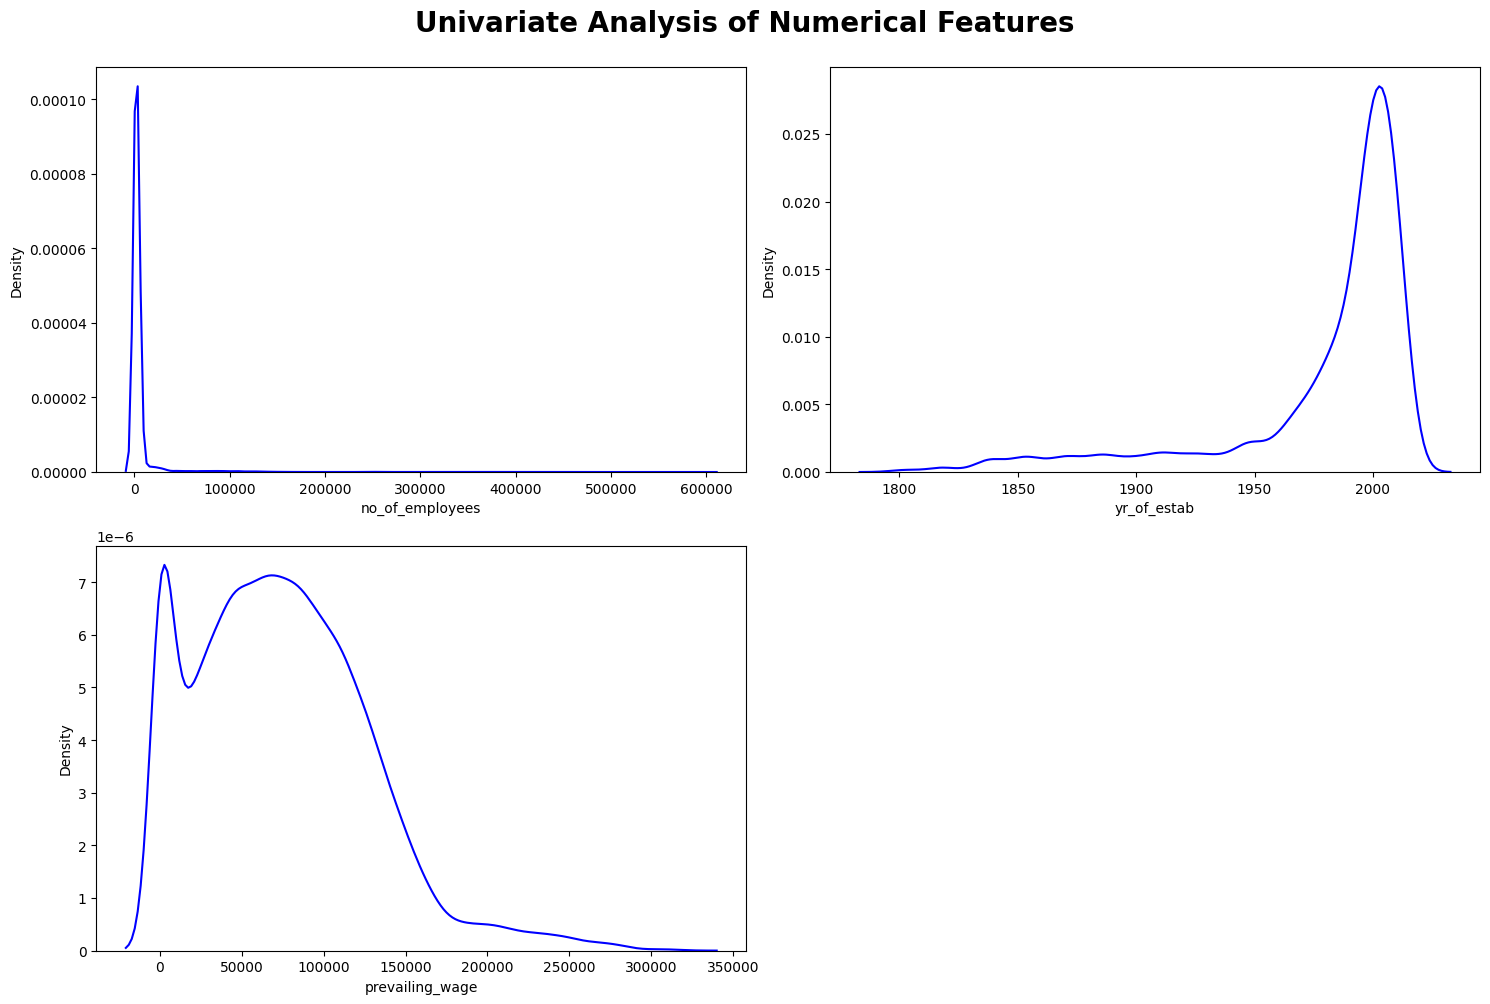

In [12]:
plt.figure(figsize=(15, 10))
plt.suptitle("Univariate Analysis of Numerical Features", fontsize = 20, fontweight = 'bold', alpha = 1, y = 1.)

for i in range(len(numeric_features)):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(x = df[numeric_features[i]], color = 'blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()


plt.show()

### Insights
- `no_of_employees` column looks more skewed due to outliers  
- `yr_of_established` is discrete feature  
- `privailing_wage` is right skewed

## Categorical Feature

In [13]:
categorical_features.remove('case_id')

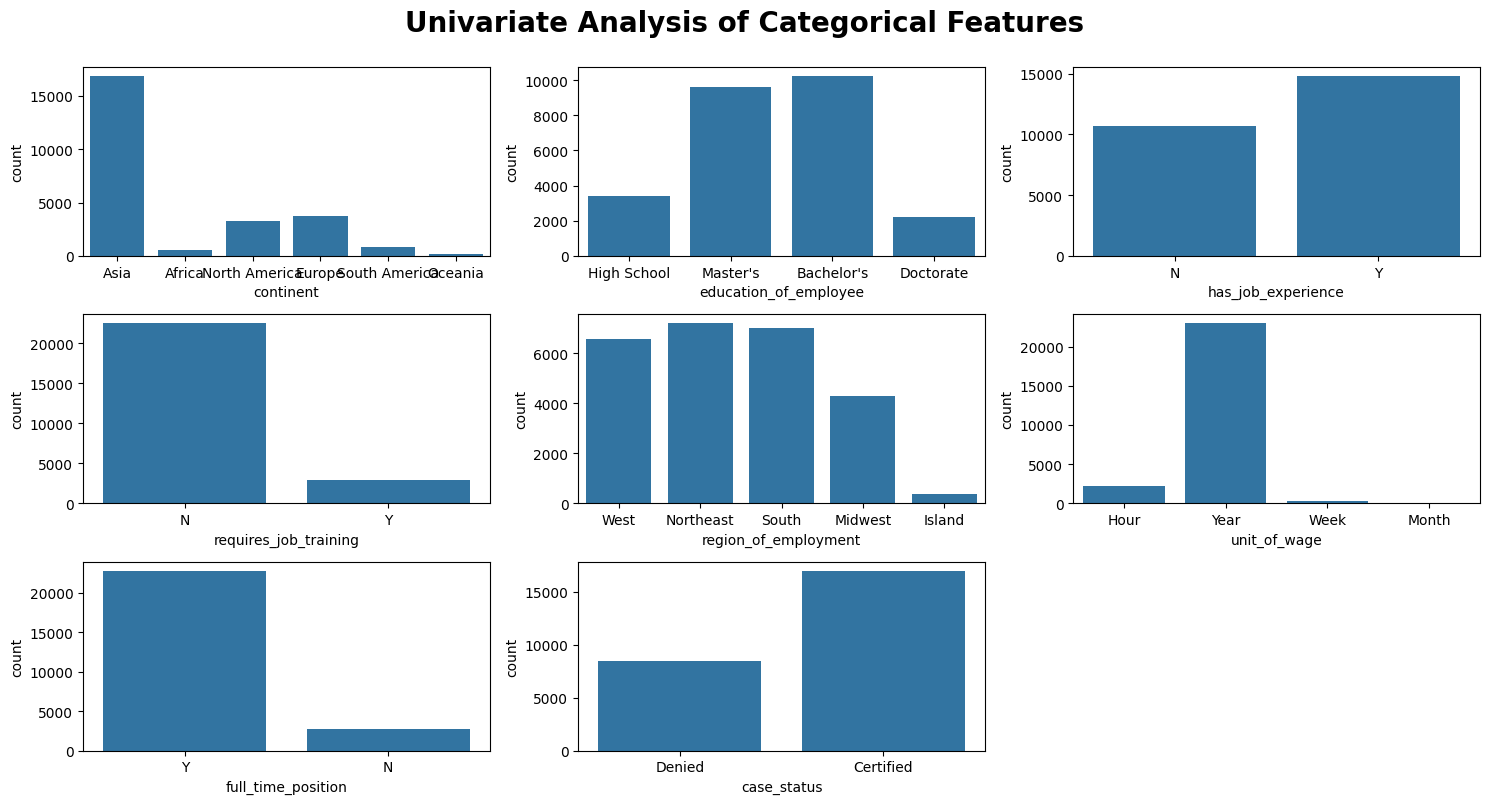

In [14]:
plt.figure(figsize=(15, 8))
plt.suptitle("Univariate Analysis of Categorical Features", fontsize = 20, fontweight = 'bold', alpha = 1, y = 1.)

for i in range(len(categorical_features)):
    plt.subplot(3, 3, i + 1)
    sns.countplot(x = df[categorical_features[i]])
    plt.xlabel(categorical_features[i])
    plt.tight_layout()
    
plt.show()

### Insights
- `required_job_training`, `unit_of_wage`, `full_time_position`, and continents column have single category dominating.  
- In rest of the columns are balanced

## Multivariate Analysis

In [15]:
discrete_feature = [feature for feature in numeric_features if len(df[feature].unique()) <= 25]
continuous_feature = [feature for feature in numeric_features if len(df[feature].unique()) > 25]

discrete_feature, continuous_feature

([], ['no_of_employees', 'yr_of_estab', 'prevailing_wage'])

## Multi-Colinearity

## Apply Chi-Square Test

In [16]:
from scipy.stats import chi2_contingency

chi2_test = []

for feature in categorical_features:
    if chi2_contingency(pd.crosstab(df['case_status'], df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Failed to Reject Null Hypothesis')
        
result = pd.DataFrame(data = [categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result        

,Column,Hypothesis Result
0,continent,Reject Null Hypothesis
1,education_of_employee,Reject Null Hypothesis
2,has_job_experience,Reject Null Hypothesis
3,requires_job_training,Failed to Reject Null Hypothesis
4,region_of_employment,Reject Null Hypothesis
5,unit_of_wage,Reject Null Hypothesis
6,full_time_position,Reject Null Hypothesis
7,case_status,Reject Null Hypothesis


##### - `requires_job_training`	Failed to Reject Null Hypothesis,
##### then `requires_job_training` is not related to the target values

In [17]:
continuous_feature

['no_of_employees', 'yr_of_estab', 'prevailing_wage']

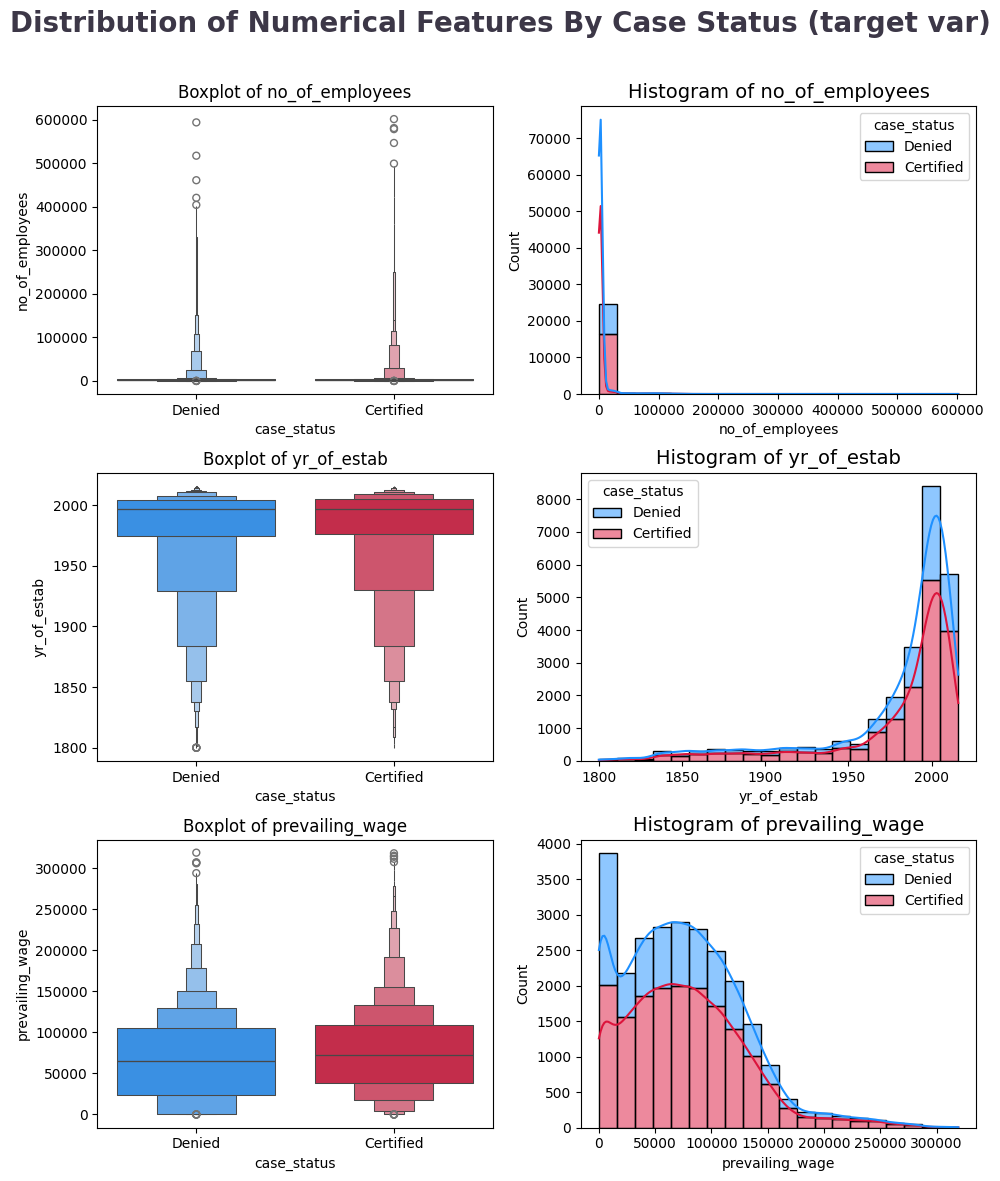

In [18]:
clr1 = ['#1E90FF', '#DC143C']
fig, ax = plt.subplots(3, 2, figsize = (10, 12))
fig.suptitle('Distribution of Numerical Features By Case Status (target var)', color = '#3c3747',
             fontsize = 20, fontweight = 'bold', ha = 'center')

for i, col in enumerate(continuous_feature):
    sns.boxenplot(data = df, x = 'case_status', y = col, palette = clr1, ax = ax[i, 0])
    ax[i, 0].set_title(f'Boxplot of {col}', fontsize = 12)
    sns.histplot(data = df, x = col, hue = 'case_status', bins = 20, kde = True,
                 multiple = 'stack', palette = clr1, ax = ax[i, 1])
    ax[i, 1].set_title(f'Histogram of {col}', fontsize = 14)
    
fig.tight_layout()
fig.subplots_adjust(top = 0.90)
plt.show()

## Distribution of Numerical Features by Case Status

The plots below show how key numerical features vary based on the `case_status` (Certified vs Denied):

- **Boxen Plots (Left)**: Show the spread and outliers for each feature by case status.
- **Histograms (Right)**: Show the distribution and density for each feature, split by case status.

### Features:
- **`no_of_employees`**: Right-skewed; most companies are small.
- **`yr_of_estab`**: Majority of companies established after 1950.
- **`prevailing_wage`**: Certified cases tend to offer higher wages.

These visualizations help identify patterns between features and visa outcomes.

## Visualisation of Target

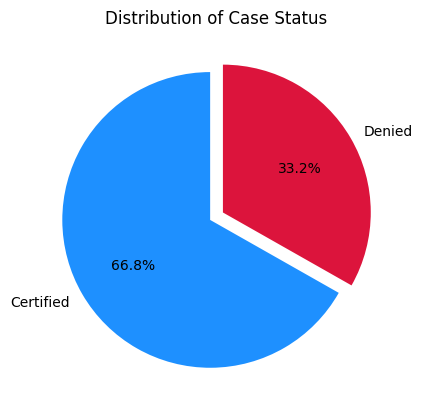

In [19]:
df['case_status'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=clr1, explode=[0.05, 0.05])
plt.title('Distribution of Case Status')
plt.ylabel('')
plt.show()

#### The result of `case_status` is imbalanced

### Does `continent` have any impact of the Visa Status

In [20]:
df.groupby('continent')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
continent     case_status            
Africa        Certified     72.050817
              Denied        27.949183
Asia          Certified     65.310480
              Denied        34.689520
Europe        Certified     79.233655
              Denied        20.766345
North America Certified     61.877278
              Denied        38.122722
Oceania       Certified     63.541667
              Denied        36.458333
South America Certified     57.863850
              Denied        42.136150

#### `continent` have impact on the `case_status`

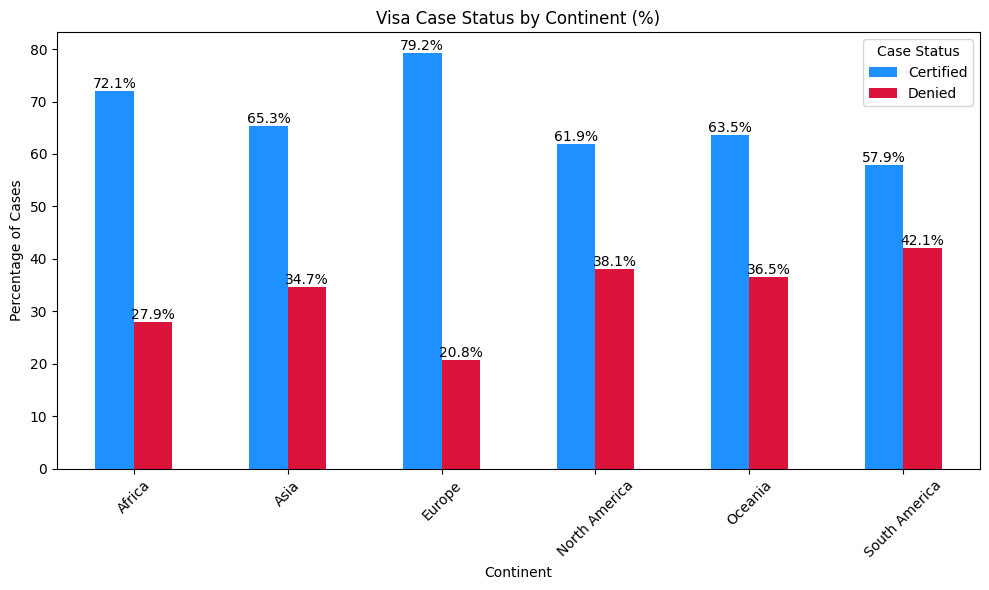

In [21]:

continent_case_status_pct = (
    df.groupby('continent')['case_status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

ax = continent_case_status_pct.plot(kind='bar', figsize=(10, 6), color=clr1)
plt.title('Visa Case Status by Continent (%)')
plt.xlabel('Continent')
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

### Does `education_of_employee` have any impact of the Visa Status

In [22]:
df.groupby('education_of_employee')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
education_of_employee case_status            
Bachelor's            Certified     62.214188
                      Denied        37.785812
Doctorate             Certified     87.226277
                      Denied        12.773723
High School           Denied        65.964912
                      Certified     34.035088
Master's              Certified     78.627777
                      Denied        21.372223

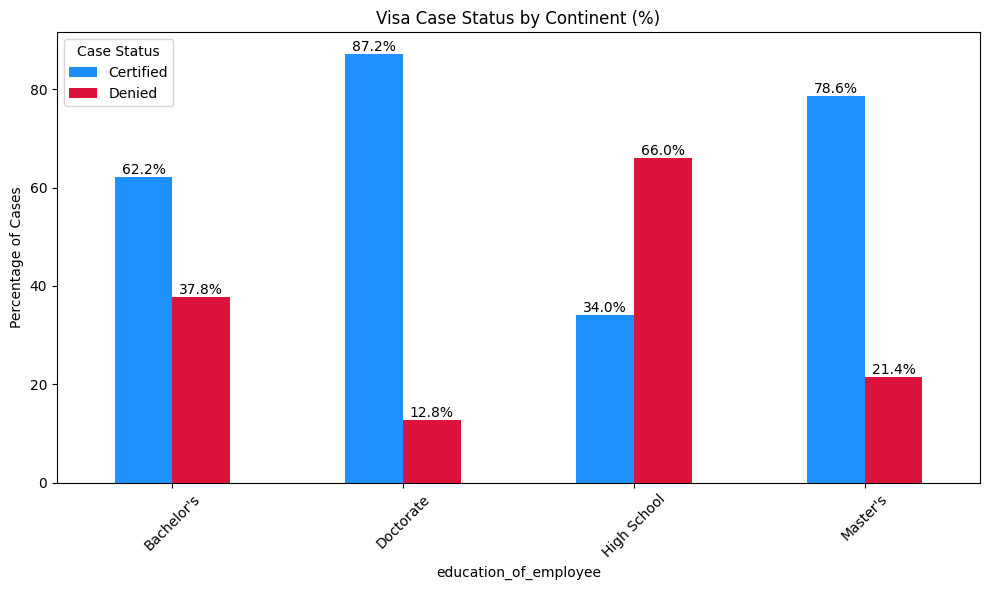

In [23]:

continent_case_status_pct = (
    df.groupby('education_of_employee')['case_status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

ax = continent_case_status_pct.plot(kind='bar', figsize=(10, 6), color=clr1)
plt.title('Visa Case Status by Continent (%)')
plt.xlabel('education_of_employee')
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

### Does `has_job_experience` have any impact of the Visa Status

In [24]:
df.groupby('has_job_experience')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
has_job_experience case_status            
N                  Certified     56.134108
                   Denied        43.865892
Y                  Certified     74.476422
                   Denied        25.523578

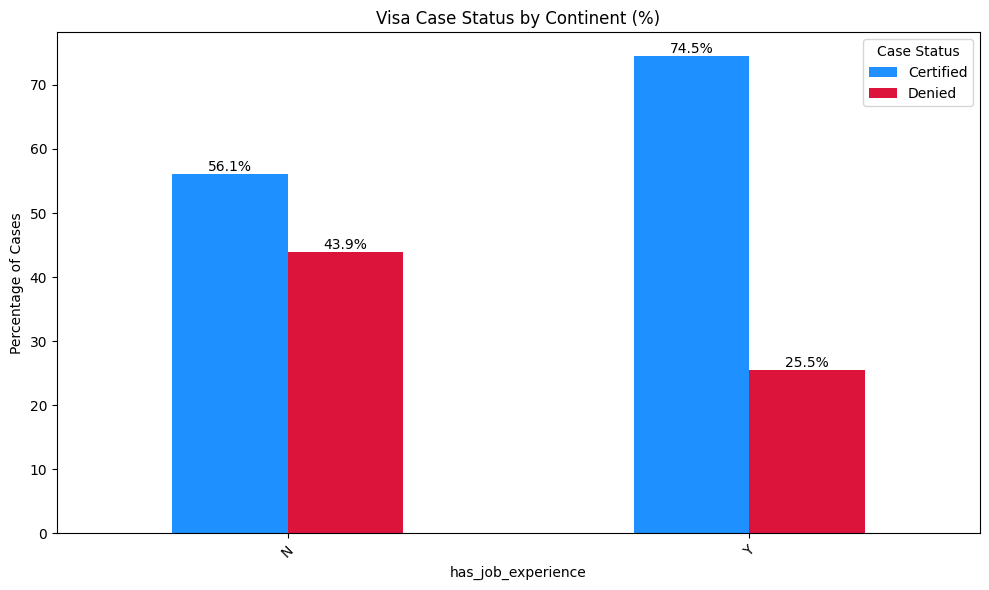

In [25]:

continent_case_status_pct = (
    df.groupby('has_job_experience')['case_status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

ax = continent_case_status_pct.plot(kind='bar', figsize=(10, 6), color=clr1)
plt.title('Visa Case Status by Continent (%)')
plt.xlabel('has_job_experience')
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

### Does `requires_job_training` have any impact of the Visa Status

In [26]:
df.groupby('requires_job_training')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
requires_job_training case_status            
N                     Certified     66.645949
                      Denied        33.354051
Y                     Certified     67.884941
                      Denied        32.115059

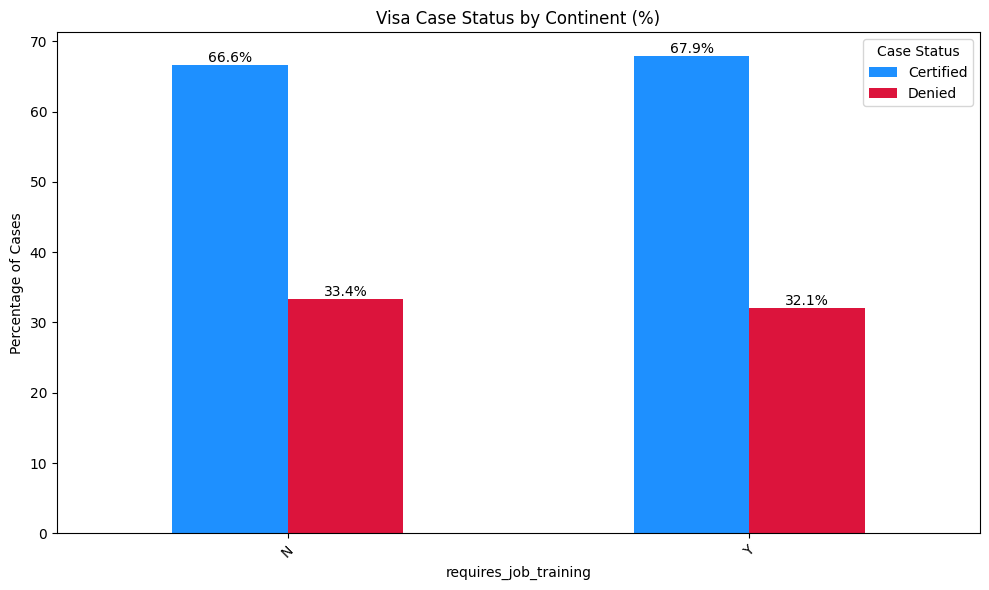

In [27]:

continent_case_status_pct = (
    df.groupby('requires_job_training')['case_status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

ax = continent_case_status_pct.plot(kind='bar', figsize=(10, 6), color=clr1)
plt.title('Visa Case Status by Continent (%)')
plt.xlabel('requires_job_training')
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

### Does `no_of_employee` have any impact of the Visa Status

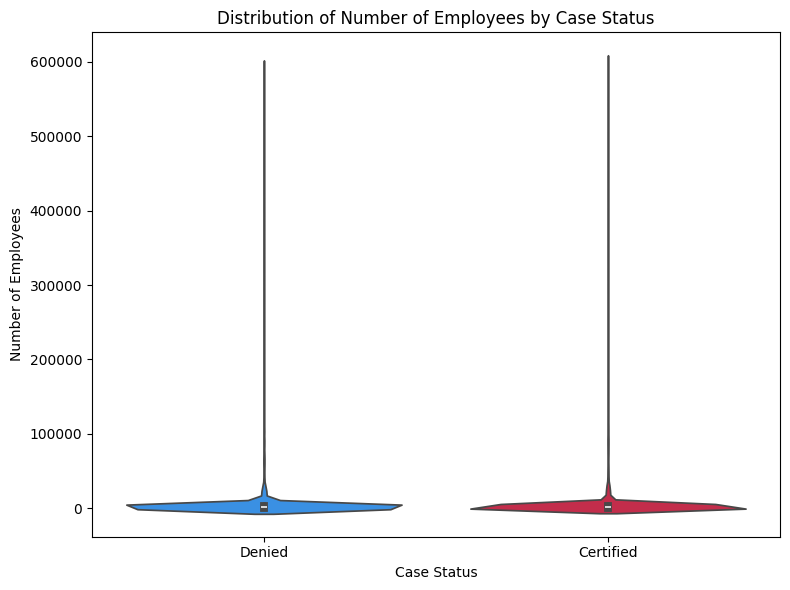

In [28]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='case_status', y='no_of_employees', data=df, palette=clr1)
plt.title('Distribution of Number of Employees by Case Status')
plt.xlabel('Case Status')
plt.ylabel('Number of Employees')
plt.tight_layout()
plt.show()

### Does `unit_of_wage` have any impact of the Visa Status

In [29]:
df.groupby('unit_of_wage')['case_status'].value_counts(normalize=True).to_frame() * 100

proportion
unit_of_wage case_status            
Hour         Denied        65.368567
             Certified     34.631433
Month        Certified     61.797753
             Denied        38.202247
Week         Certified     62.132353
             Denied        37.867647
Year         Certified     69.885027
             Denied        30.114973

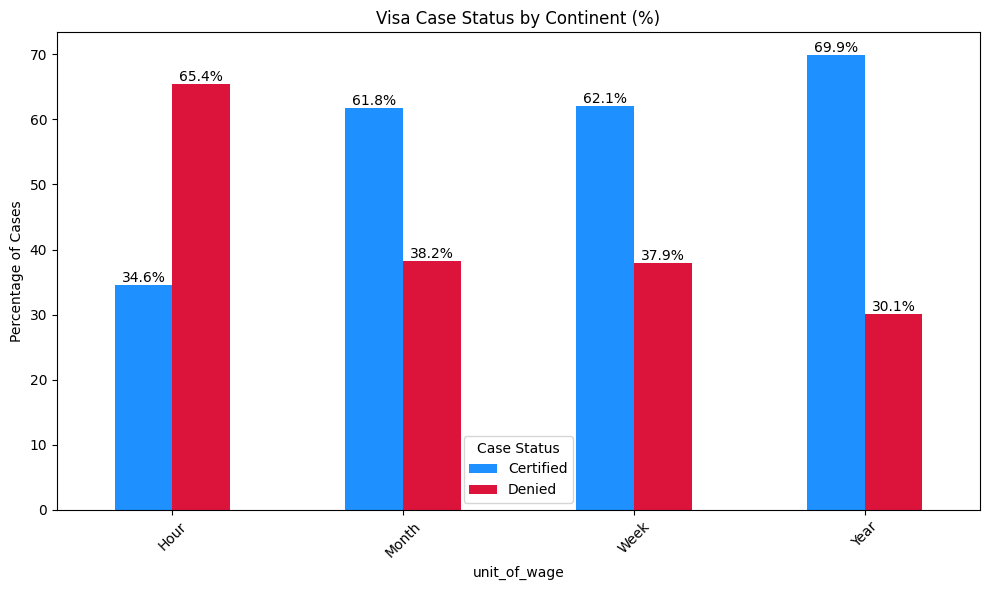

In [30]:
continent_case_status_pct = (
    df.groupby('unit_of_wage')['case_status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

ax = continent_case_status_pct.plot(kind='bar', figsize=(10, 6), color=clr1)
plt.title('Visa Case Status by Continent (%)')
plt.xlabel('unit_of_wage')
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

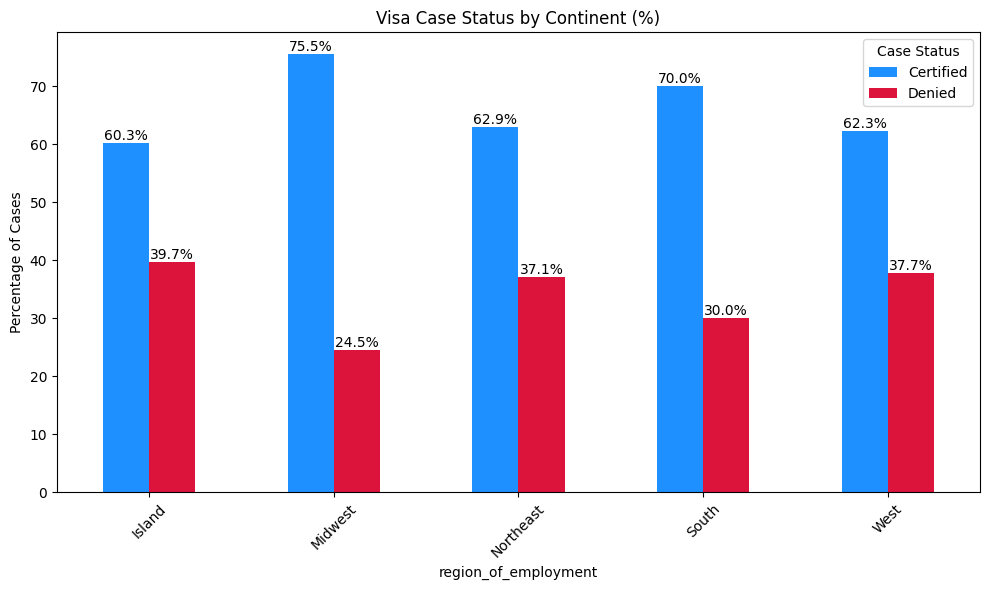

In [31]:
continent_case_status_pct = (
    df.groupby('region_of_employment')['case_status']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

ax = continent_case_status_pct.plot(kind='bar', figsize=(10, 6), color=clr1)
plt.title('Visa Case Status by Continent (%)')
plt.xlabel('region_of_employment')
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=45)
plt.legend(title='Case Status')
plt.tight_layout()

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%')

plt.show()

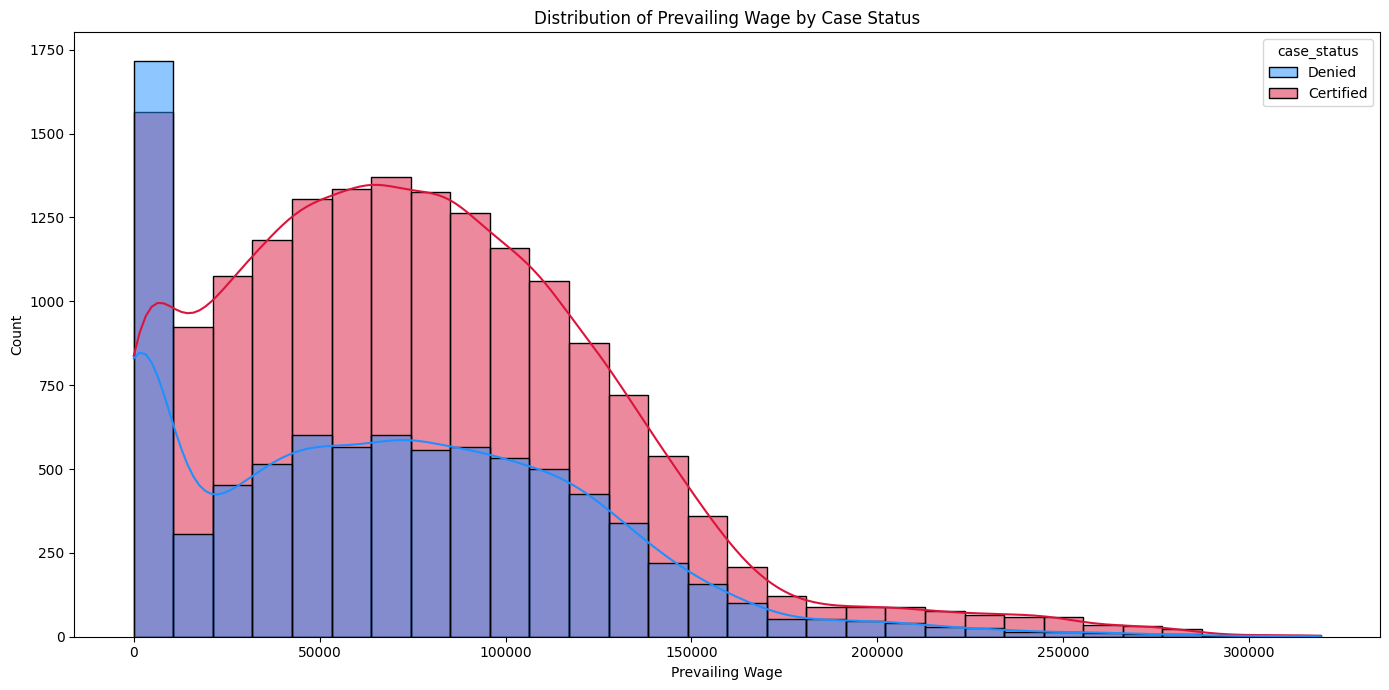

In [32]:
plt.figure(figsize=(14, 7))
sns.histplot(data=df, x='prevailing_wage', hue='case_status', kde=True, bins=30, palette=clr1)
plt.title('Distribution of Prevailing Wage by Case Status')
plt.xlabel('Prevailing Wage')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [33]:
# Previling base based on education
df.groupby('education_of_employee')['prevailing_wage'].mean().reset_index().sort_values(by='prevailing_wage')


,education_of_employee,prevailing_wage
1,Doctorate,64561.076657
2,High School,71582.147756
0,Bachelor's,73405.443735
3,Master's,78843.057843


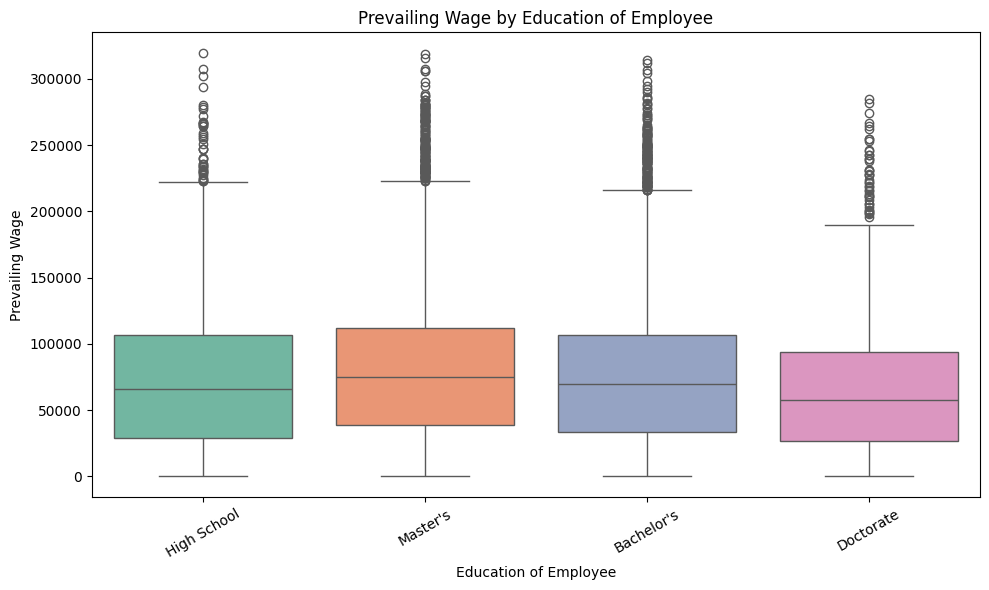

In [34]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='education_of_employee', y='prevailing_wage', data=df, palette='Set2')
plt.title('Prevailing Wage by Education of Employee')
plt.xlabel('Education of Employee')
plt.ylabel('Prevailing Wage')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [35]:
# Prevailing wage based on job experience
df.groupby('has_job_experience')['prevailing_wage'].mean().reset_index().sort_values(by='prevailing_wage')

,has_job_experience,prevailing_wage
1,Y,73728.405363
0,N,75464.159920
